<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      570 non-null    datetime64[ns]
 1   y       570 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


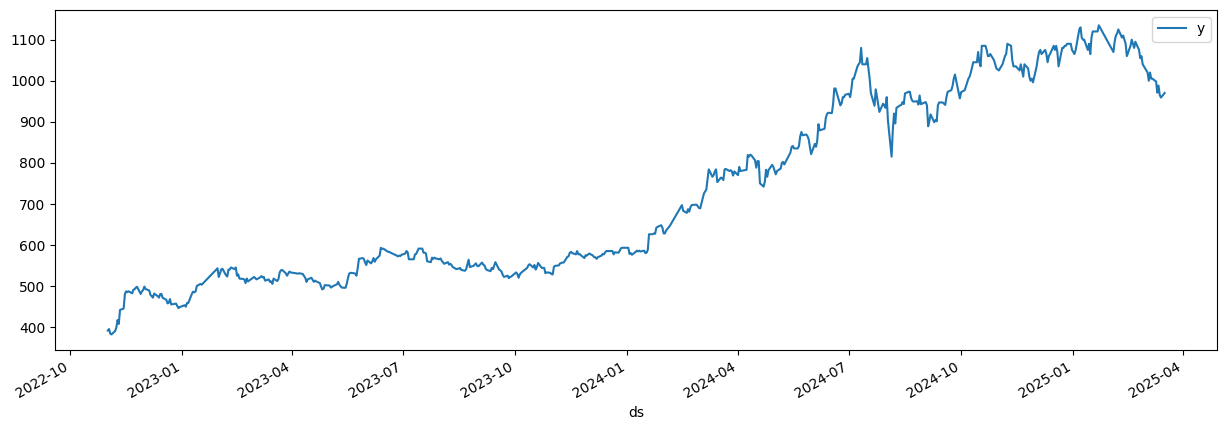

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed
# set_log_level("ERROR")

df = pd.read_csv('data/stocks/2330_stock_data_0317.csv', parse_dates=['ds'])[['ds', 'y']]
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [12]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
# set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    # n_changepoints=0,
    n_lags=10,
)
# Use static plotly in notebooks
# m.set_plotting_backend("plotly-static")
m.set_plotting_backend("matplotlib")

df_train, df_val = m.split_df(df, valid_p=0.2)
print(f"validation: {df_val['ds'].iloc[0]} ~ {df_val['ds'].iloc[-1]}")
set_random_seed(0)
metrics = m.fit(df_train, validation_df=df_val)
metrics

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.data.processing._handle_missing_data) - Added 50 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 50 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 50 NaN values in column y 

validation: 2024-09-13 00:00:00 ~ 2025-03-17 00:00:00
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (16) is too small than the required number                     for the learning rate finder (219). The results might not be optimal.
Finding best initial lr: 100%|██████████| 219/219 [00:00<00:00, 301.91it/s]


Training: |          | 0/? [00:09<?, ?it/s, v_num=2967, MAE_val=23.30, RMSE_val=27.70, Loss_val=0.00373, RegLoss_val=0.000, train_loss=0.00146, reg_loss=0.000, MAE=13.00, RMSE=18.30, Loss=0.0015, RegLoss=0.000] 


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,985.244385,1229.638550,1.536139,0.0,0,1.362027,0.0,1144.599243,1301.678345,1.369646,0.0
1,807.579712,1068.620239,1.229002,0.0,1,1.044047,0.0,899.906494,1092.496704,1.061891,0.0
2,646.540833,922.333191,0.967780,0.0,2,0.803963,0.0,701.299805,911.224854,0.801347,0.0
3,477.446716,728.532349,0.698866,0.0,3,0.595138,0.0,531.976318,743.597534,0.591460,0.0
4,323.672424,541.835205,0.452685,0.0,4,0.403665,0.0,382.635040,581.787537,0.402640,0.0
...,...,...,...,...,...,...,...,...,...,...,...
135,23.271032,27.749054,0.003735,0.0,135,0.001462,0.0,12.607706,17.776314,0.001419,0.0
136,23.237700,27.724552,0.003729,0.0,136,0.001463,0.0,12.425947,17.395859,0.001402,0.0
137,23.236568,27.714376,0.003726,0.0,137,0.001462,0.0,12.785816,17.841427,0.001449,0.0
138,23.228365,27.717125,0.003727,0.0,138,0.001461,0.0,12.867331,17.906321,0.001455,0.0


In [13]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,985.244385,1229.638550,1.536139,0.0,0,1.362027,0.0,1144.599243,1301.678345,1.369646,0.0
1,807.579712,1068.620239,1.229002,0.0,1,1.044047,0.0,899.906494,1092.496704,1.061891,0.0
2,646.540833,922.333191,0.967780,0.0,2,0.803963,0.0,701.299805,911.224854,0.801347,0.0
3,477.446716,728.532349,0.698866,0.0,3,0.595138,0.0,531.976318,743.597534,0.591460,0.0
4,323.672424,541.835205,0.452685,0.0,4,0.403665,0.0,382.635040,581.787537,0.402640,0.0
...,...,...,...,...,...,...,...,...,...,...,...
135,23.271032,27.749054,0.003735,0.0,135,0.001462,0.0,12.607706,17.776314,0.001419,0.0
136,23.237700,27.724552,0.003729,0.0,136,0.001463,0.0,12.425947,17.395859,0.001402,0.0
137,23.236568,27.714376,0.003726,0.0,137,0.001462,0.0,12.785816,17.841427,0.001449,0.0
138,23.228365,27.717125,0.003727,0.0,138,0.001461,0.0,12.867331,17.906321,0.001455,0.0


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed i

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 222.07it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



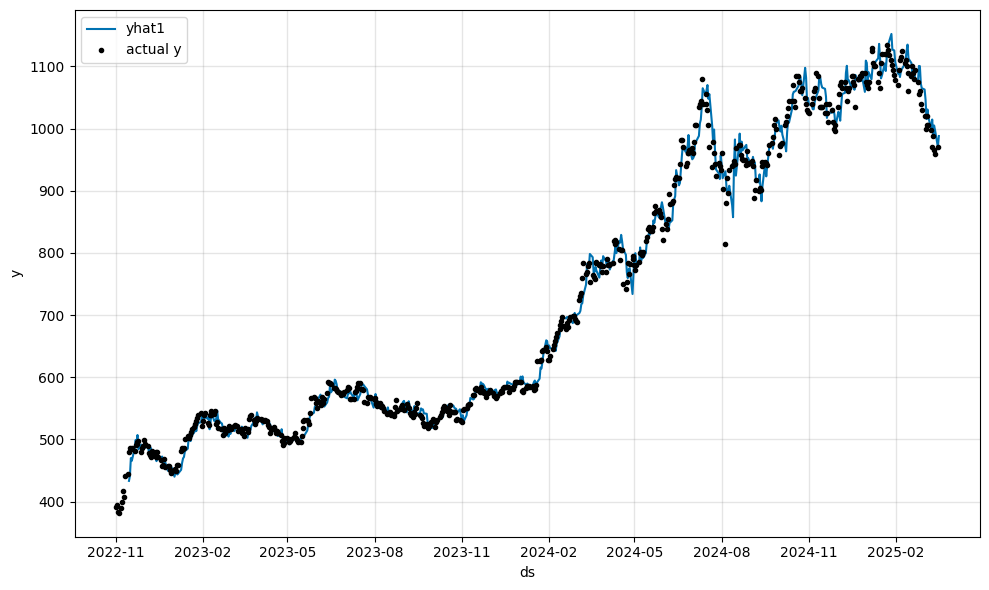

In [14]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [15]:
from src.model.utils import val_mape

print(f"MAPE={val_mape(df_val, forecast) * 100:.2f}%")

MAPE=2.16%


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  days_i = pd.date_range(start="2017-01-01", periods=week_days * 24, freq="H") + pd.Timedelta(days=weekly_start)



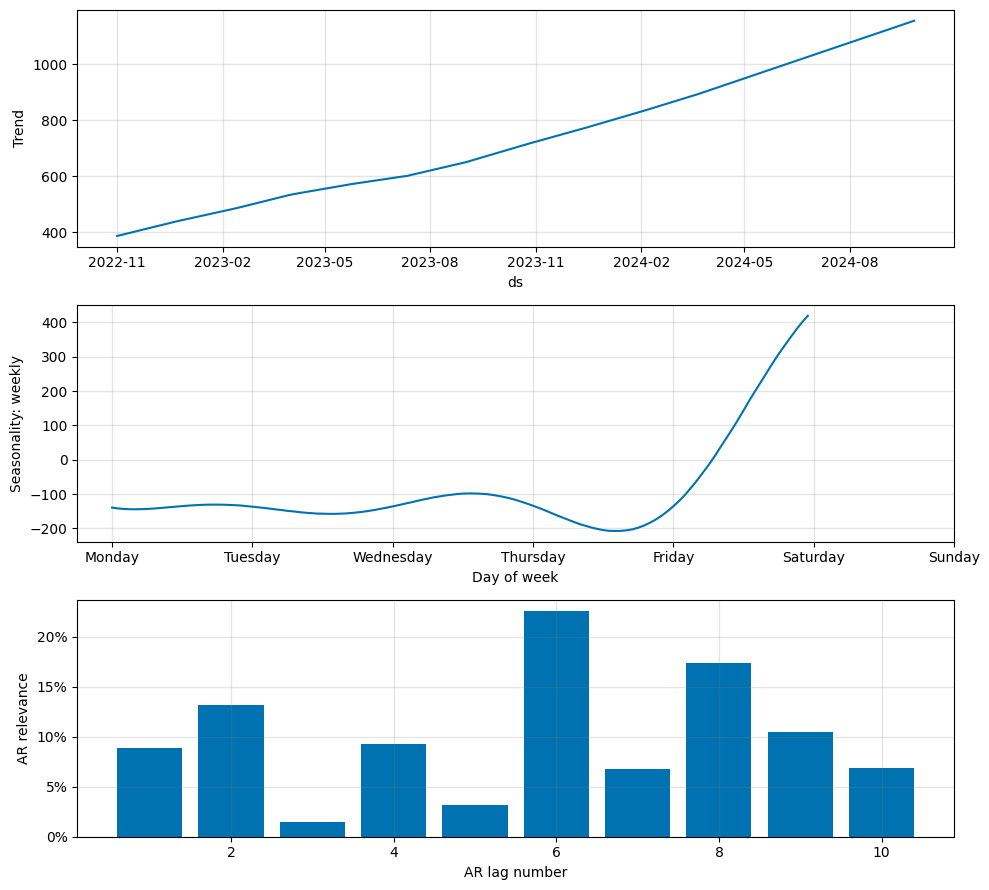

In [16]:
m.plot_parameters(components=["trend", "seasonality","autoregression"])

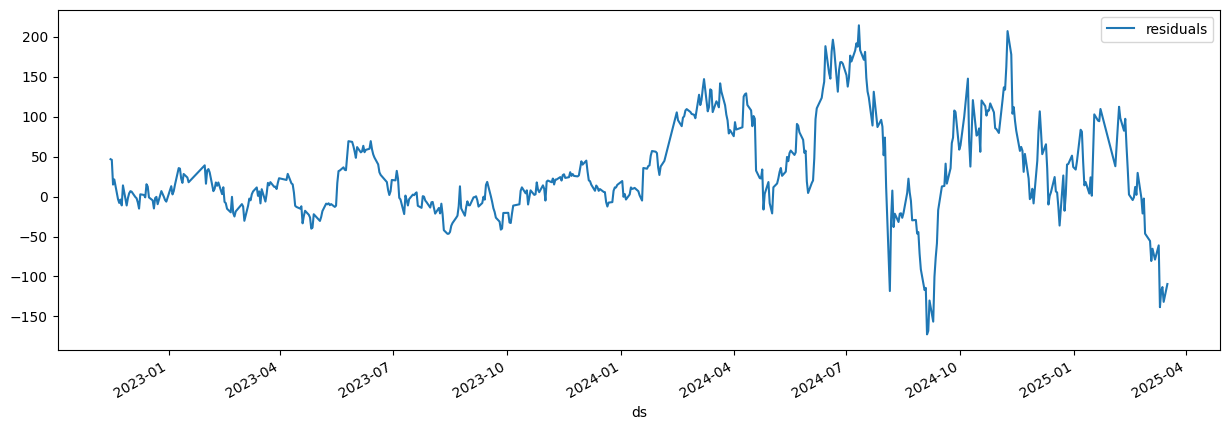

In [17]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(15, 5))